In [1]:
#importing required libraries
import numpy as np
import pandas as pd

In [2]:
#importing the data set
concrete_df = pd.read_csv('concrete.csv')

In [3]:
# Apply the head function to check if data import has been successful, in this case the latter is true
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concrete_df.info()

# The info function describes that none of the attributes have missing/null values
# the next session proves the same

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

This dataset does not contain any missing values

In [6]:
# Keeping ready, a copy of the original dataframe
copy_df= concrete_df

In [7]:
copy_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


Slag 

Ash

Superplastisizer

Contain '0' as values.
These values are going to be treated as valid, as concrete can be made in the absence of the above mentioned components

In [8]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

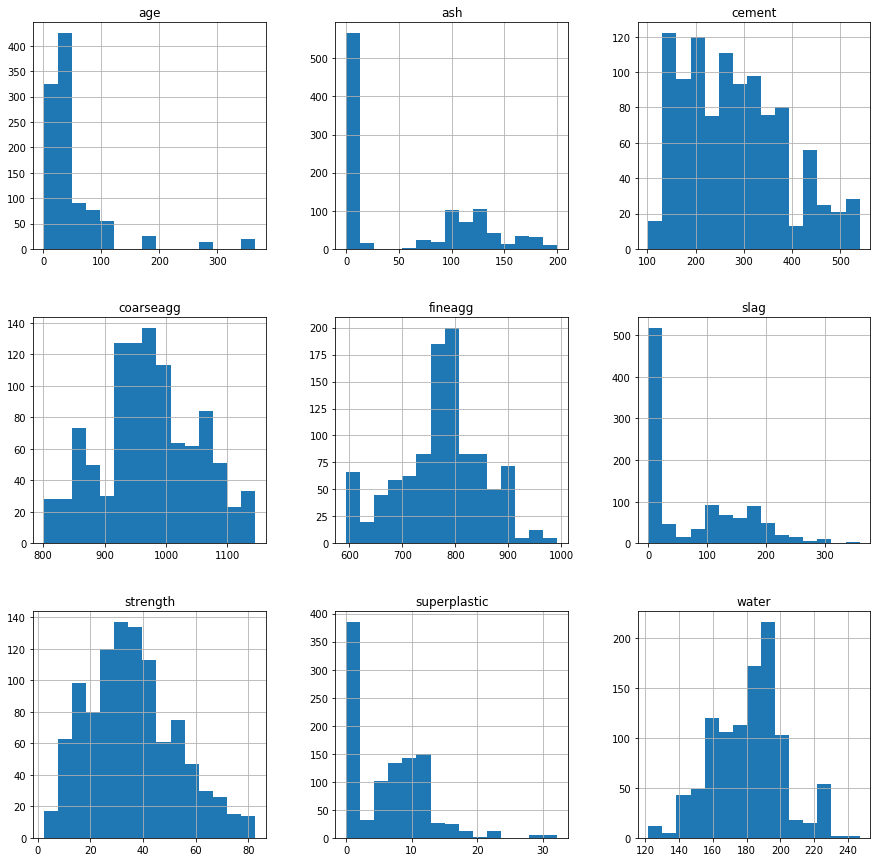

In [10]:
concrete_df.hist(figsize=(15,15),grid=True,bins=15);

Histogram confirms the presence of a high number of zeros in attributes : age, ash,slag, superplastisizer.

almost all of the attributes, except for age , display skewness, indicating the presence of outliers.
Age is a categorical data, displays imbalance.

C:\Users\kamalashree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


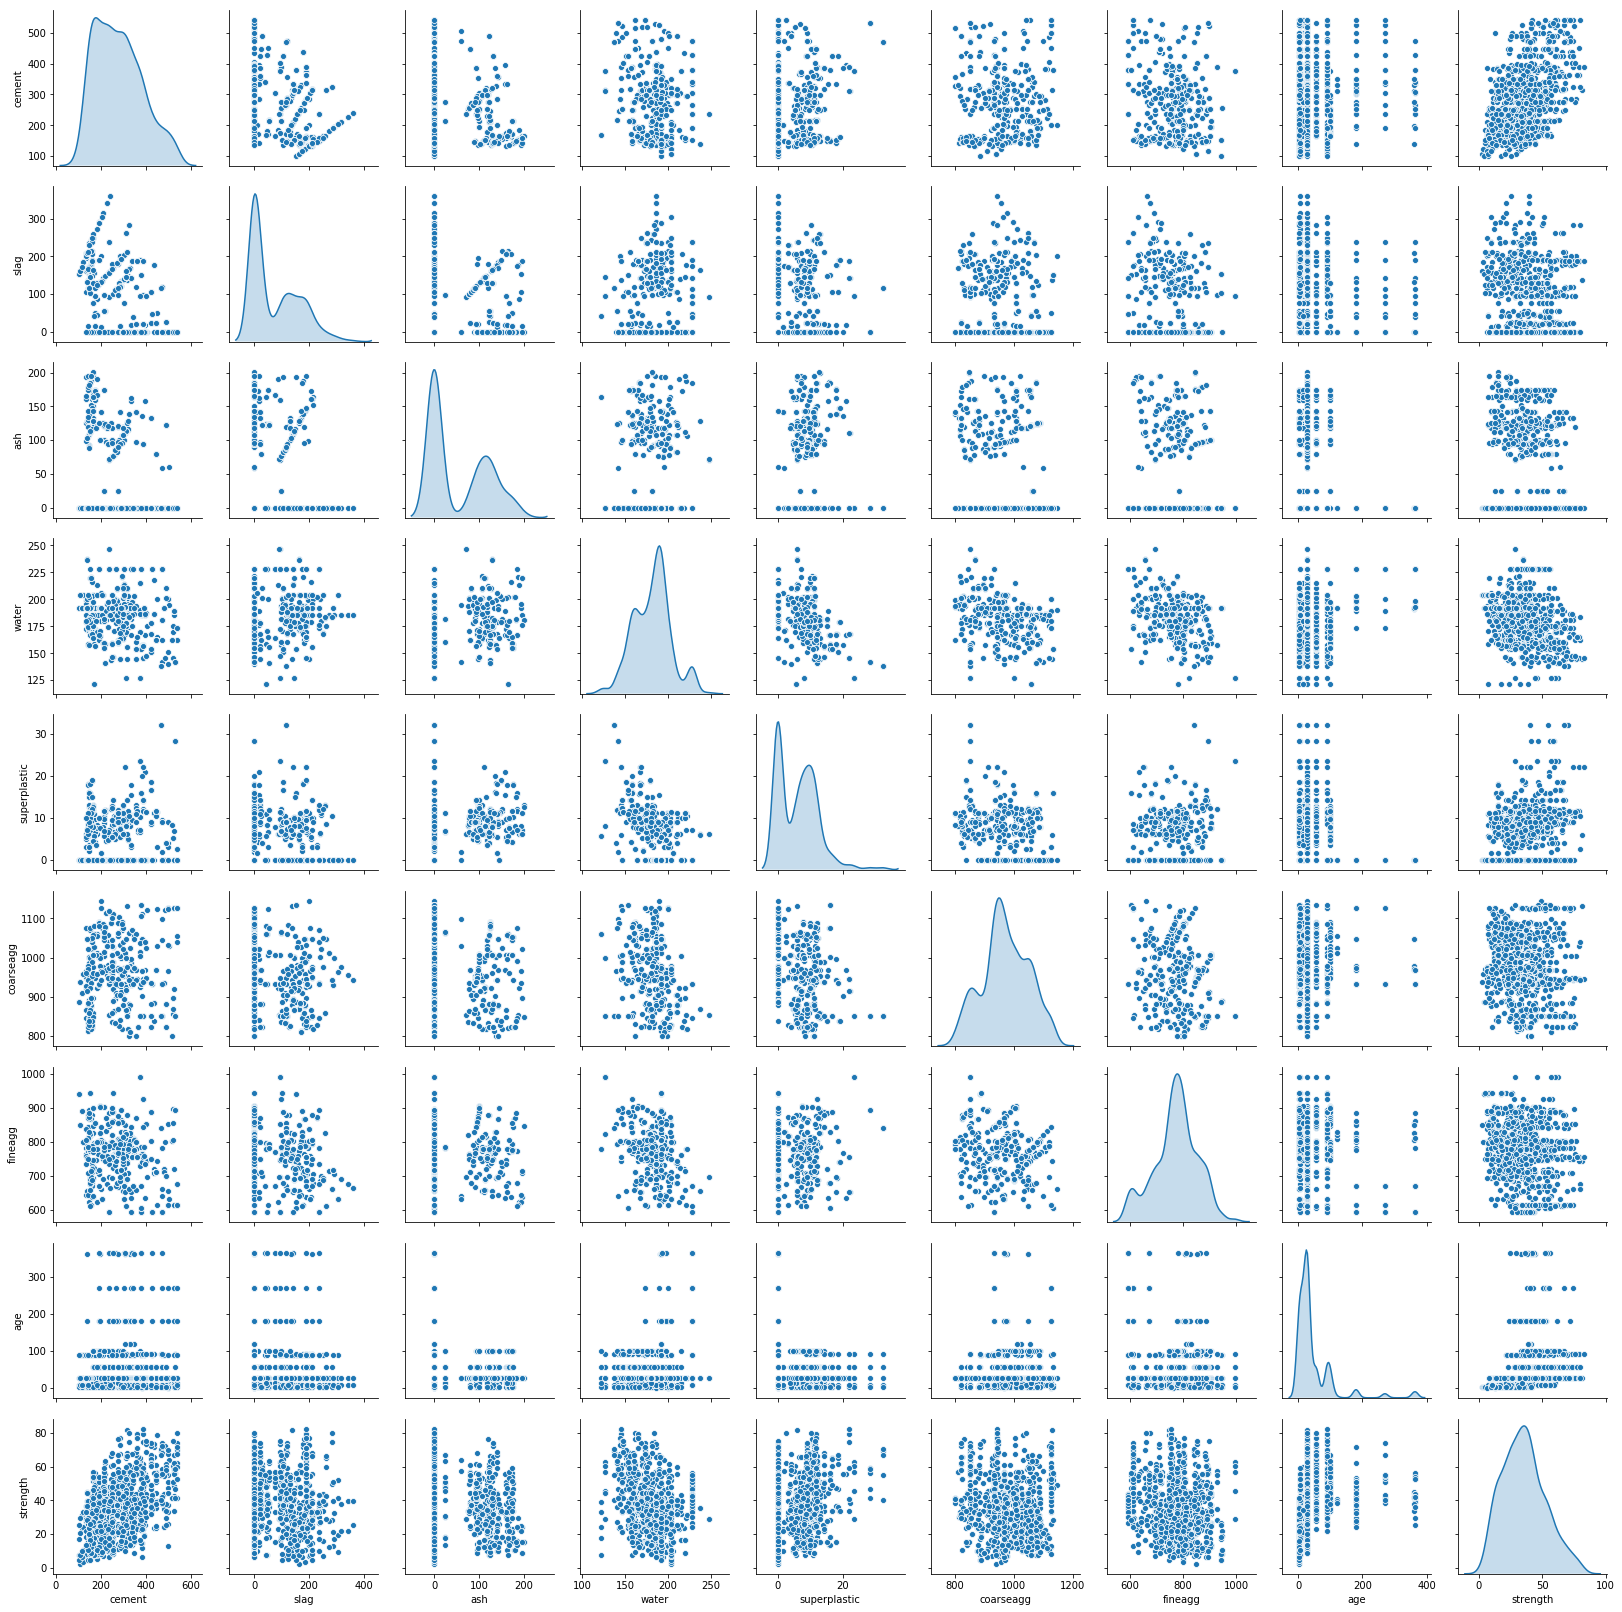

In [19]:
sns.pairplot(data=concrete_df,diag_kind='kde')

Quantity of cement used has a weak, positive, linear correlation with strength.

none of the other attributes show any kind of trend when co-related with strength.

There is no observable co-relation between any of the attributes.

Standardizing the dataset by applying z score, to standardize the value's relationship to the mean

copy_df, the copy of the original data set will be used for any manipulation in the data.

In [12]:
from scipy.stats import zscore

concrete_df_z=copy_df.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=copy_df.columns)

In [13]:
concrete_df_z.head() #Standardizing successful

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

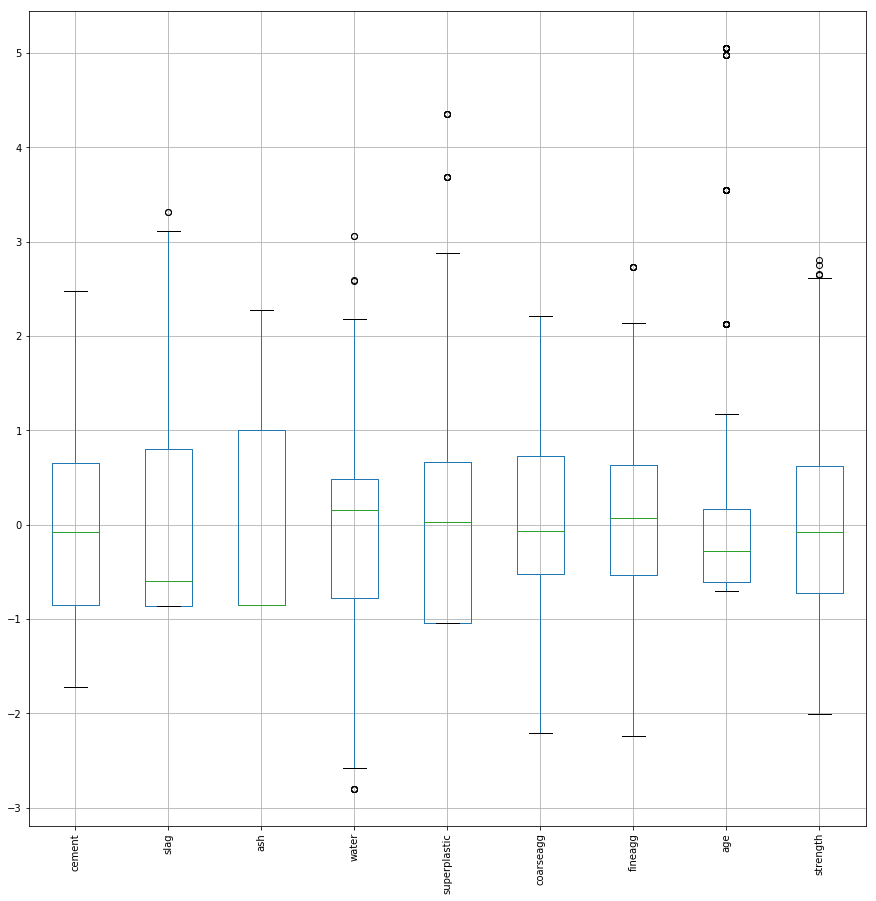

In [16]:
concrete_df_z.boxplot(figsize=(15,15))
plt.xticks(rotation=90)


In [17]:
for col in concrete_df_z.columns[:-1]:
    q1= concrete_df_z[col].quantile(0.25)
    q3= concrete_df_z[col].quantile(0.75)
    iqr= q3-q1
    low= q1-1.5*iqr
    high= q3+1.5*iqr
    concrete_df_z.loc[(concrete_df_z[col]<low)| (concrete_df_z[col]>high),col] = concrete_df_z[col].median()

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

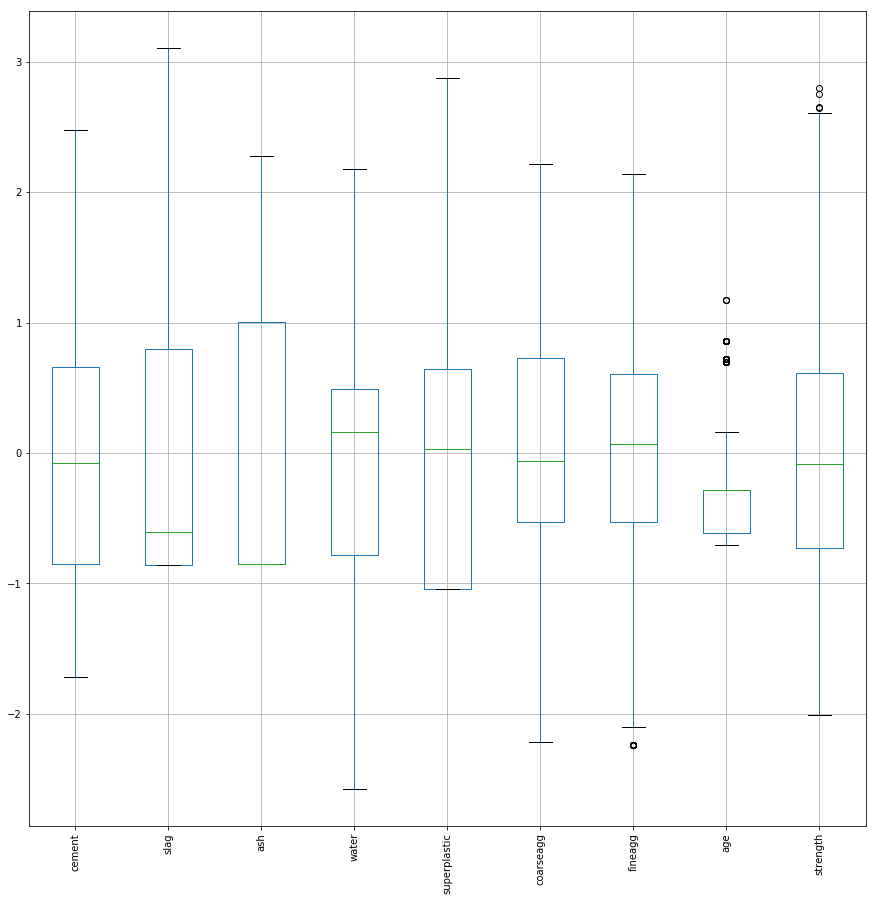

In [18]:
concrete_df_z.boxplot(figsize=(15,15))
plt.xticks(rotation=90)


As can been seen in the boxplot above, Outliers for most of the attributes have been replaced with their respective medians.
The choice of median and not mean, has been made because medians are largely unaffected by extreme values; As the number of outliers in each of those attributes is pretty less, replacing their values as medians is not going to impact the current distribution.


In [23]:
from sklearn.cluster import KMeans

cluster_range=range(3,7)
cluster_errors=[]
for n_clusters in cluster_range:

    clusters = KMeans(n_clusters,n_init=5)
    clusters.fit(concrete_df)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df[0:9]

,num_clusters,cluster_errors
0,3,2.499599e+07
1,4,2.198953e+07
2,5,1.997692e+07
3,6,1.778008e+07


The result above shows the number of clusters and the variance obtained in each.

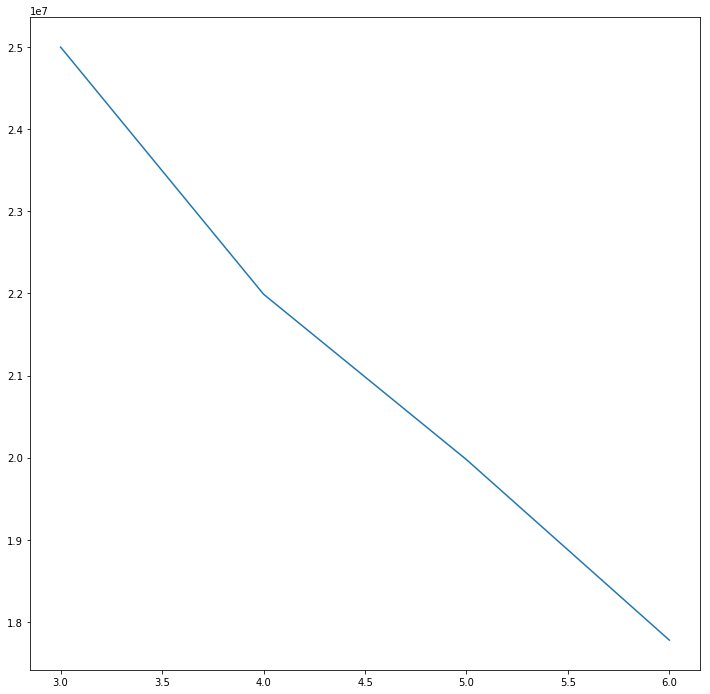

In [29]:
plt.figure(figsize=(12,12))
plt.plot( clusters_df.num_clusters,clusters_df.cluster_errors)

A minimum of 4 clusters is optimum in this case

In [32]:
cluster=KMeans(n_clusters=4,random_state=1234)
cluster.fit(concrete_df_z)
prediction= cluster.predict(concrete_df_z)
concrete_df_z['clust_id']=prediction
centroids = cluster.cluster_centers_
centroids

centroid_df=pd.DataFrame(centroids,columns=list(concrete_df_z))
centroid_df                      #presented below are the centroids of clusters of the respective attributes and the cluster numbers

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clust_id
0,-0.585173,-0.574314,1.118902,-0.373871,0.424133,0.276829,0.350842,-0.145434,-0.218857,4.884981e-15
1,1.009184,0.444791,-0.420561,-0.932083,0.882008,-0.666727,0.108153,-0.186801,1.171713,3.000000e+00
2,0.739553,-0.779723,-0.792682,0.656850,-0.991555,0.450490,-0.239590,-0.263316,-0.252857,1.000000e+00
3,-0.788548,1.217081,-0.428026,0.674645,-0.508069,-0.291948,-0.405076,-0.277604,-0.428477,2.000000e+00


Analyzing Strength vs the other attributes

C:\Users\kamalashree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


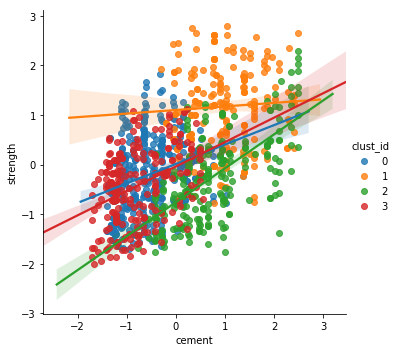

In [34]:
attribute= 'cement'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')

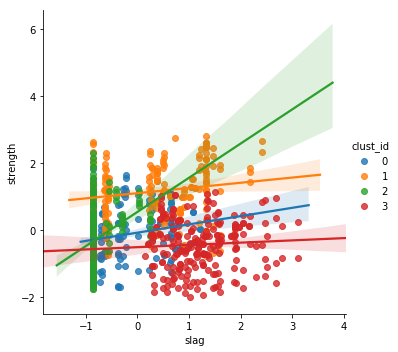

In [35]:
attribute= 'slag'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')

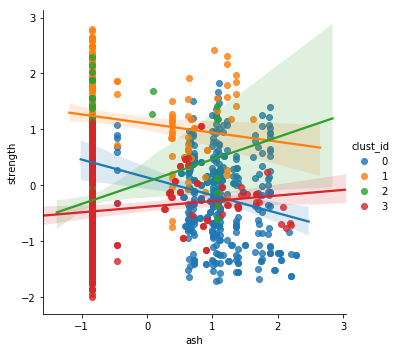

In [36]:
attribute= 'ash'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')

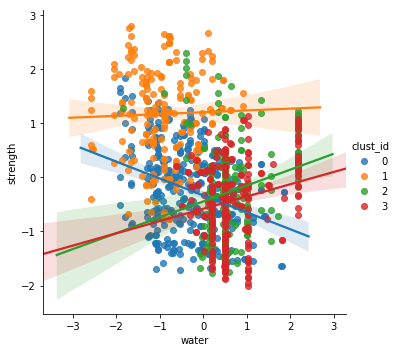

In [37]:
attribute= 'water'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')

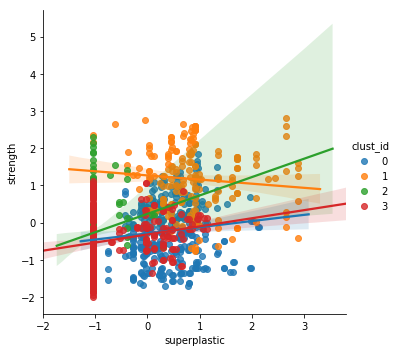

In [38]:
attribute= 'superplastic'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')

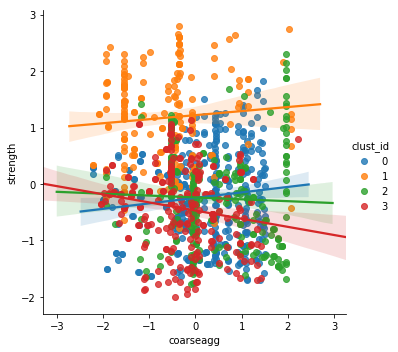

In [39]:
attribute= 'coarseagg'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')

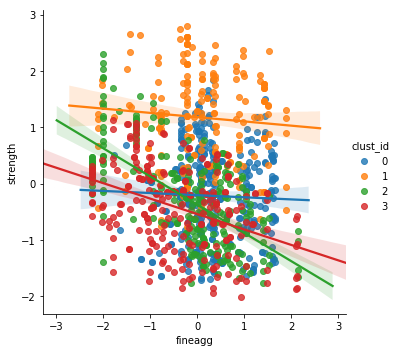

In [40]:
attribute= 'fineagg'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')

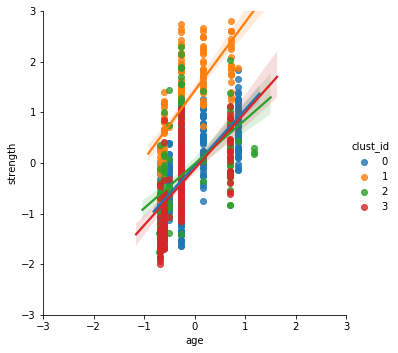

In [114]:
attribute= 'age'
plot=sns.lmplot(attribute,'strength',data=concrete_df_z,hue='clust_id')
plot.set(xlim=(-3,3))
plot.set(ylim=(-3,3))

Apart from cement and water.The clusters indicating different variations of respective attributes mentioned in the latter.
none of the other attributes look promising to improving the strength.
Also, the clusters are not tight and distinct, not much help.

This will further be confirmed by using the feature importance option on the decision tree regressor

In [64]:
#Splitting the dataset into test and train sets
y=concrete_df_z[['strength']]
X=concrete_df_z.drop(labels=['strength','clust_id'], axis=1)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [105]:
model_tree=DecisionTreeRegressor(random_state=0,max_depth=15)

In [106]:
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [107]:
print(pd.DataFrame(model_tree.feature_importances_,columns=['Imp'],index=X_train.columns))

                   Imp
cement        0.347037
slag          0.093114
ash           0.011620
water         0.128719
superplastic  0.018989
coarseagg     0.033936
fineagg       0.037186
age           0.329398


The result above, further strngthens the fact obtained that apart from cement,water and from this analysis, age seem to be the only important features required for the contribution to the strength of concrete

In [221]:
#Remove the unnecessary/unhelpful attributes from the dataset, as contribution is very less as discussed above
del_attr=['ash','superplastic','strength','coarseagg','fineagg','clust_id']
X=concrete_df_z.drop(labels=del_attr,axis=1)

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [391]:
model_tree=DecisionTreeRegressor(random_state=0,max_depth=25,max_leaf_nodes=20,min_samples_leaf=20)

In [392]:
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [393]:
print(pd.DataFrame(model_tree.feature_importances_,columns=['Imp'],index=X_train.columns))

             Imp
cement  0.415569
slag    0.069907
water   0.124237
age     0.390288


In [394]:
model_tree.score(X_test,y_test)

0.7426451327157036

In [395]:
model_tree.score(X_train,y_train)

0.7852621023205266

Using the support vector regressor 

In [437]:
from sklearn import svm

model_2=svm.SVR(C=30)
model_2.fit(X_train,y_train)


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=30, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [438]:
prediction_2=model_2.predict(X_test)

In [439]:
model_2.score(X_test,y_test)

0.8560642646524866

In [440]:
model_2.score(X_train,y_train)

0.8931873532545639

Ensemble Techniques

In [496]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [497]:
gbmtree=GradientBoostingRegressor(n_estimators=50)
gbmtree.fit(X_train,y_train)
print(gbmtree.score(X_train,y_train))
print(gbmtree.score(X_test,y_test))

C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9005431814905145
0.8461626616690396


In [501]:
bagging_model=BaggingRegressor(n_estimators=75,oob_score=True)
bagging_model.fit(X_train,y_train)
print(bagging_model.score(X_train,y_train))
print(bagging_model.score(X_test,y_test))

C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.977178849853749
0.8977864335869844


In [506]:
RandomF_model=RandomForestRegressor(n_estimators=100)
RandomF_model.fit(X_train,y_train)
print(RandomF_model.score(X_train,y_train))
print(RandomF_model.score(X_test,y_test))

C:\Users\kamalashree\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9768435085763297
0.8969207252094592


Summary:

The data set contained many attributes that did not have a correlation with the output/dependant variable as seen on the pairplot.

There were gaussian distributions, but no distinct clusters in any of the attributes.

Water,cement,age were the only attributes that provided any strength to the concrete,rest of the attributes proved weak or of not much help based on the dataset provided.

An accuracy ranging from 84-89% was obtained upon testing various regression algorithms.
